# Cursos de Series de tiempo con *Machine Learning*
## Modulo 77. Modelo de Informer
                        Elaborado por: Naren Castellon

<center><img src="./imagen/Informer- LSTF(Long Sequence Time-Series Forecasting).png" width="900" height="500"></center>

# **Contenido**

1. Introducción
2. Definición del Modelo
3. Caso de estudio: Forecasting Precio del Camaron
4. Cargando librerias y datos
5. Análisis Exploratorio de Datos
6. Modelando con NeuralForecast
7. Evaluar el rendimiento del modelo.
8. Conclusión

# **Introducción**

El modelo Informer aborda los desafíos de complejidad computacional del Transformador tradicional para el `Forecasting` a largo plazo.

La arquitectura tiene tres características distintivas: - Un mecanismo de autoatención `ProbSparse` con una complejidad de tiempo y memoria O $Llog(L)$. - Un proceso de destilación de autoatención que prioriza la atención y maneja de manera eficiente secuencias de entrada largas. - Un decodificador multipaso MLP que predice secuencias de series temporales largas en una sola operación hacia adelante en lugar de paso a paso.

El modelo Informer utiliza un enfoque de tres componentes para definir su incrustación: - Emplea características autorregresivas codificadas obtenidas de una red de convolución. - Utiliza incrustaciones posicionales relativas a la ventana derivadas de funciones armónicas. - Se utilizan incrustaciones posicionales absolutas obtenidas de características de calendario.

## El Modelo Informer: Una Breve Explicación

**El modelo Informer** es una arquitectura de redes neuronales diseñada específicamente para abordar el desafío de realizar pronósticos a largo plazo en series de tiempo. A diferencia de los modelos Transformer tradicionales, que pueden tener dificultades con secuencias muy largas, el Informer ha sido optimizado para manejar estas secuencias de manera eficiente y precisa.

### Características Clave del Modelo Informer

* **Atención Esparsa Probabilística (ProbSparse Self-Attention):** Esta técnica reduce drásticamente la complejidad computacional al enfocar la atención en un subconjunto de elementos, lo que permite procesar secuencias largas de manera más eficiente.
* **Destilación de Auto-Atención:** Prioriza la información más relevante dentro de la secuencia, lo que mejora la eficiencia y la precisión del modelo, especialmente para secuencias largas.
* **Decodificador MLP Multi-Paso:** A diferencia de los decodificadores tradicionales que generan una predicción por paso de tiempo, el decodificador MLP del Informer puede generar múltiples predicciones en un solo paso, acelerando significativamente el proceso de inferencia.
* **Embebimientos Compuestos:** El modelo utiliza una combinación de embebimientos para capturar diferentes aspectos de la serie de tiempo, incluyendo:
    * **Embebimientos Autoregresivos Codificados:** Capturan las dependencias entre los pasos de tiempo.
    * **Embebimientos Posicionales Relativos de Ventana:** Codifican la información posicional relativa dentro de una ventana de tiempo.
    * **Embebimientos Posicionales Absolutos:** Codifican la información posicional absoluta basada en características del calendario.

### Ventajas del Modelo Informer

* **Manejo eficiente de secuencias largas:** El Informer está especialmente diseñado para trabajar con series de tiempo largas, lo que lo hace ideal para aplicaciones como pronósticos meteorológicos a largo plazo o análisis de series temporales de alta frecuencia.
* **Mayor precisión en pronósticos a largo plazo:** Gracias a sus mecanismos de atención y decodificación, el Informer puede realizar pronósticos más precisos a largo plazo en comparación con otros modelos.
* **Velocidad de inferencia más rápida:** El decodificador MLP multi-paso permite al modelo generar predicciones más rápido, lo que es crucial para aplicaciones en tiempo real.

### Aplicaciones del Modelo Informer

El modelo Informer tiene un amplio rango de aplicaciones, incluyendo:

* **Pronósticos meteorológicos:** Predicción de temperatura, precipitación y otros fenómenos meteorológicos a largo plazo.
* **Análisis de series temporales financieras:** Predicción de precios de acciones, tasas de interés y otros indicadores económicos.
* **Análisis de series temporales de sensores:** Monitoreo de sistemas industriales y detección de anomalías.
* **Procesamiento del lenguaje natural:** Modelado de secuencias largas de texto.

**En general, el modelo Informer es una herramienta poderosa para el análisis de series de tiempo, especialmente cuando se trata de secuencias largas y pronósticos a largo plazo.**



# **Definición del Modelo:**

Muchas aplicaciones del mundo real requieren la predicción de series temporales de secuencias largas, como la planificación del consumo de electricidad. El Forecasting 
de series temporales de secuencias largas (LSTF) exige una alta capacidad de predicción del modelo, que es la capacidad de capturar de manera eficiente el acoplamiento de dependencia de largo alcance preciso entre la salida y la entrada. Estudios recientes han demostrado el potencial de Transformer para aumentar la capacidad de predicción. Sin embargo, existen varios problemas graves con Transformer que impiden que sea directamente aplicable a LSTF, incluida la complejidad temporal cuadrática, el alto uso de memoria y la limitación inherente de la arquitectura del codificador-decodificador. Para abordar estos problemas, diseñamos un modelo eficiente basado en transformador para LSTF, llamado Informer, con tres características distintivas: 

- (i) un mecanismo de autoatención `ProbSparse`, que logra $O(LlogL)$ en complejidad temporal y uso de memoria, y tiene un rendimiento comparable en la alineación de dependencia de secuencias. 

- (ii) la destilación de autoatención resalta la atención dominante al reducir a la mitad la entrada de la capa en cascada, y maneja de manera eficiente secuencias de entrada extremadamente largas. 

- (iii) el decodificador de estilo generativo, si bien es conceptualmente simple, predice las secuencias de series temporales largas en una sola operación hacia adelante en lugar de hacerlo paso a paso, lo que mejora drásticamente la velocidad de inferencia de las predicciones de secuencias largas. Los experimentos exhaustivos en cuatro conjuntos de datos a gran escala demuestran que Informer supera significativamente a los métodos existentes y proporciona una nueva solución al problema de LSTF.

## Descripción General del Modelo

Descripción general del modelo Informer. Izquierda: El codificador recibe entradas de secuencias largas masivas (series verdes). Reemplazamos la autoatención canónica con la autoatención ProbSparse propuesta. El trapezoide azul es la operación de destilación de autoatención para extraer la atención dominante, lo que reduce drásticamente el tamaño de la red. Las réplicas de apilamiento de capas aumentan la robustez. Derecha: El decodificador recibe entradas de secuencias largas, rellena los elementos objetivo hasta cero, mide la composición de atención ponderada del mapa de características y predice instantáneamente los elementos de salida (series naranjas) en un estilo generativo.

<center><img src="https://www.researchgate.net/publication/376829985/figure/fig1/AS:11431281214487321@1703610281446/Informer-model-architecture.png" width="400" height="300"></center>

## Informer Architecture

Codificador: Permitir el procesamiento de entradas secuenciales más largas bajo la limitación de uso de memoria

La forma en que está diseñado el codificador es extraer las dependencias robustas de largo alcance de las entradas secuenciales largas. El siguiente esquema muestra la arquitectura esquemática del codificador:

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*LcgcoQsklr8kAAeHIIdJ4w.png" width="900" height="300"></center>

**La pila única en el codificador de Informer:** 

(1) El stack horizontal representa una réplica individual del codificador en la Fig.(1). 

(2) La que se muestra en el stack principal que recibe toda la secuencia de entrada. Luego, la segunda pila toma medias porciones de la entrada y las pilas subsiguientes se repiten. 

(3) Las capas rojas son matrices de producto escalar y obtienen una disminución en cascada al aplicar la destilación de autoatención en cada capa. 

(4) Concatenar los mapas de características de todas las pilas como la salida del codificador.

El mapa de características del codificador tiene combinaciones adicionales de valor V como resultado del mecanismo de autoatención ProbSparse. La operación de destilación se utiliza para puntuar las superiores con características dominantes y construir un mapa de características de autoatención concentrado en la siguiente capa.

En la figura anterior, se puede ver que la estructura consta de varios bloques de Atención, Conv1d y capas MaxPooling para codificar los datos de entrada. Las réplicas construidas de la pila principal con entradas divididas a la mitad elevan la confiabilidad de la operación de destilación. Además, constantemente, el número de capas de destilación de autoatención se reduce una tras otra. Al final del codificador, los investigadores concatenaron el Mapa de características para dirigir la salida del codificador al descodificador.

# Caso de estudio: Forecasting del precio del camarón

En la industria acuícola, el camarón es uno de los productos más importantes y demandados a nivel mundial. Sin embargo, el precio de producción del camarón puede verse afectado por una serie de factores, como la disponibilidad de alimento, las condiciones climáticas, los costos de producción y la demanda del mercado. En este caso de estudio, exploraremos cómo se puede utilizar el análisis de series temporales y las técnicas de pronóstico para predecir el precio de la producción de camarón, lo que permitirá a los productores y comerciantes tomar decisiones informadas y optimizar sus operaciones.

Datos:
Para realizar el pronóstico del precio de la producción de camarón, recopilamos datos históricos de precios y factores influyentes durante un período de cinco años. Estos datos incluyen el precio de venta del camarón, variables climáticas como la temperatura y la precipitación, y los costos de producción, como el precio de los alimentos y los insumos acuícolas. Además, se incluyen datos de demanda y oferta del mercado, como la producción de camarón en otros países y las políticas comerciales internacionales.

Análisis exploratorio:
Antes de aplicar técnicas de pronóstico, realizamos un análisis exploratorio de los datos para comprender mejor las tendencias y patrones subyacentes. Utilizamos gráficos de series temporales para visualizar la fluctuación del precio de la producción de camarón a lo largo del tiempo y examinamos las correlaciones entre las variables climáticas, los costos de producción y el precio de venta. También realizamos pruebas de estacionariedad para asegurarnos de que los datos sean adecuados para el análisis de series temporales.

Modelado y pronóstico:
Después de completar el análisis exploratorio, procedimos al modelado y pronóstico del precio de la producción de camarón. Utilizamos técnicas avanzadas de pronóstico, como modelos ARIMA (AutoRegressive Integrated Moving Average) y modelos de suavizado exponencial, para capturar las tendencias y los patrones estacionales en los datos. Ajustamos varios modelos utilizando diferentes combinaciones de variables explicativas, como las variables climáticas y los costos de producción.

Evaluación del pronóstico:
Una vez que obtuvimos los pronósticos, evaluamos la precisión de los modelos utilizando diversas métricas de error, como MAE, RMSE y MAPE. Comparamos los resultados de los diferentes modelos y seleccionamos el más preciso y confiable para el pronóstico del precio de la producción de camarón. También realizamos análisis de sensibilidad para evaluar cómo los cambios en las variables clave afectan los pronósticos y la toma de decisiones.

Aplicación y optimización:
Con los pronósticos en mano, los productores y comerciantes de camarón pueden tomar decisiones informadas sobre la producción, el almacenamiento y la comercialización del camarón. Pueden ajustar su estrategia de precios en función de las proyecciones futuras y optimizar sus operaciones para maximizar los beneficios. Además, los pronósticos también pueden ser utilizados por los inversores y las instituciones financieras para evaluar la viabilidad de los proyectos acuícolas y tomar decisiones de financiamiento.

Conclusiones:
El pronóstico del precio de la producción de camarón a través del análisis de series temporales proporciona una herramienta valiosa para los actores de la industria acuícola. Permite una mejor comprensión de las tendencias y los factores influyentes, lo que ayuda a tomar decisiones informadas y optimizar las operaciones. Sin embargo, es importante reconocer que el pronóstico está sujeto a incertidumbre y que los resultados deben ser interpretados con precaución. El monitoreo continuo y la actualización de los modelos de pronóstico son fundamentales para mantener la precisión y la relevancia en un entorno empresarial dinámico.

# Cargamos las librerias

In [1]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats
# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import random

# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from utilsforecast.plotting import plot_series

# Modelling with Sklearn
# ==============================================================================
import sklearn
from sklearn.linear_model import LinearRegression

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


## Cargamos los datos

In [3]:
df = pd.read_csv("./data/shrimp-prices.csv", )
df

,Month,Price,Change
0,1/1/1991,12.24,0.00
1,2/1/1991,12.90,5.39
2,3/1/1991,13.23,2.56
3,4/1/1991,13.23,0.00
4,5/1/1991,12.68,-3.84
...,...,...,...
356,9/1/2020,11.86,-4.35
357,10/1/2020,11.35,-3.70
358,11/1/2020,11.53,1.59
359,12/1/2020,11.68,1.30


# Análisis Exploratorio de Datos

In [4]:
df.tail(3)

,Month,Price,Change
358,11/1/2020,11.53,1.59
359,12/1/2020,11.68,1.30
360,1/1/2021,11.75,0.60


In [5]:
df.dtypes

Month      object
Price     float64
Change    float64
dtype: object

In [6]:
df.Month = df.Month.apply(pd.to_datetime) # pd.to_datetime(df['Date'])
df.columns = ["Date", "Price", "Change"]
df.tail(3)

,Date,Price,Change
358,2020-11-01,11.53,1.59
359,2020-12-01,11.68,1.30
360,2021-01-01,11.75,0.60


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    361 non-null    datetime64[ns]
 1   Price   361 non-null    float64       
 2   Change  361 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.6 KB


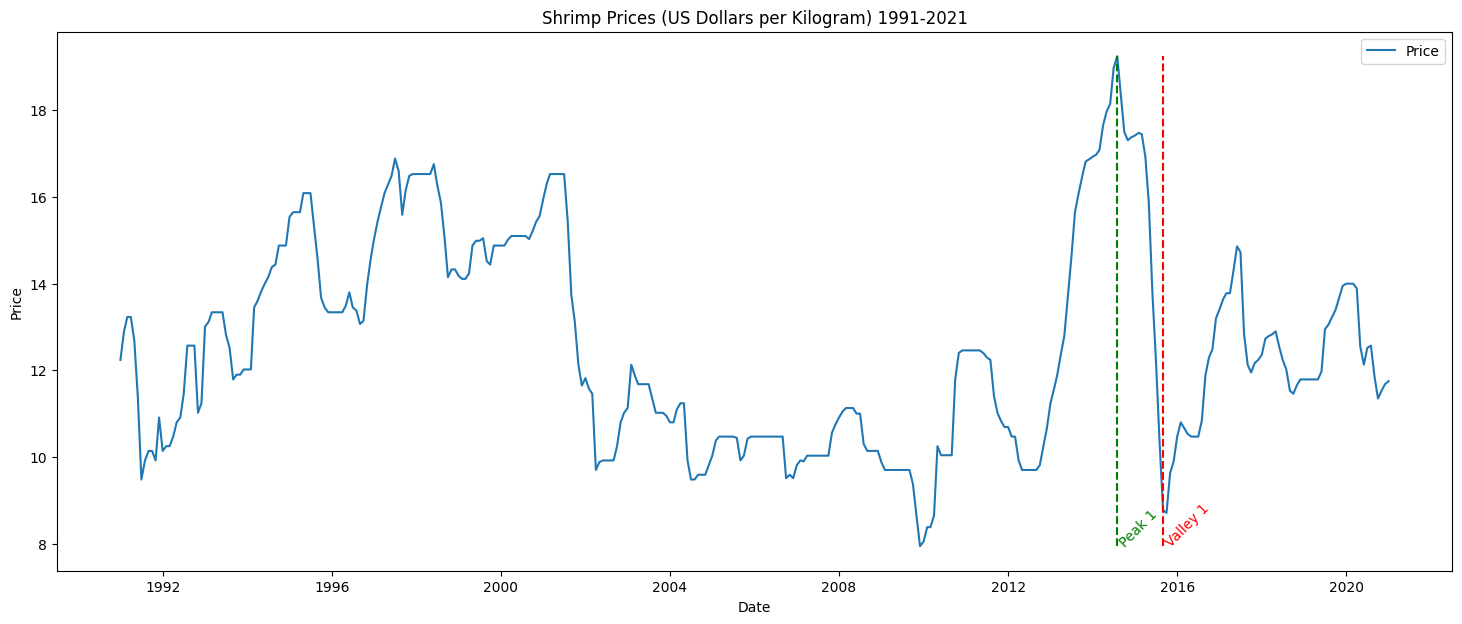

In [8]:
from datetime import datetime
# Interesting milestones
unersupply1 = {'date':datetime(year=2014, month=8, day=1), 'label':'Peak 1', 'color':'green'}
oversupply1 = {'date':datetime(year=2015, month=9, day=1), 'label':'Valley 1', 'color':'red'}
milestones  = [unersupply1, oversupply1]
# Create the datetime line plot
plt.figure() # figsize=(WIDTH, HEIGHT)
legends={"Price":"Price"}
sns.lineplot(x=df['Date'].rename(legends), y=df['Price'], label=legends['Price'])
# Plot the different milestones
if milestones:
    minimum = df['Price'].min()
    maximum = df['Price'].max()
    for milestone in milestones:
        plt.plot([milestone['date'], milestone['date']], [minimum, maximum], color=milestone['color'], linestyle='dashed', ms=10)
        plt.text(milestone['date'], minimum, milestone['label'], color=milestone['color'], rotation=45)
plt.ylabel('Price')
title = 'Shrimp Prices (US Dollars per Kilogram) 1991-2021'
plt.title(title)
plt.show()

<Figure size 1800x600 with 0 Axes>

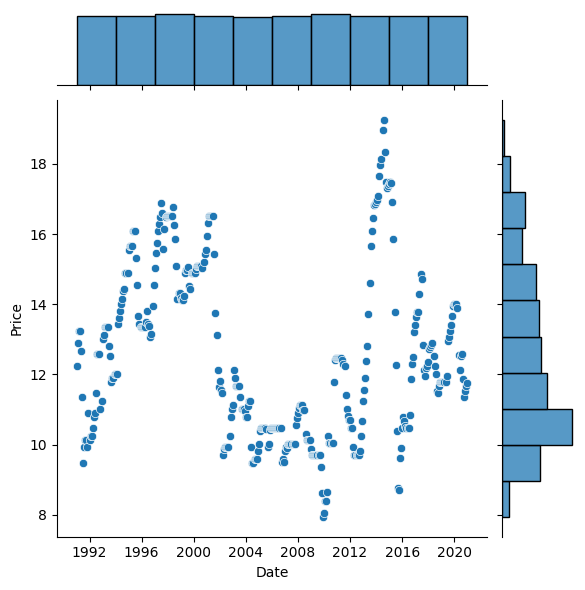

In [9]:
plt.figure( figsize = (18,6))
sns.jointplot(data=df, x="Date", y="Price");

## Variables de estacionalidades

In [10]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)
df['dayofweek'] = df['Date'].apply(lambda x:x.dayofweek)
#df['weekofyear'] = df['Date'].apply(lambda x:x.isocalendar().week)
#df['is_weekend'] = df['Date'].apply(lambda x:x.dayofweek // 5)
#df.drop('Date',axis=1,inplace=True)
df.dtypes

Date         datetime64[ns]
Price               float64
Change              float64
day                   int64
month                 int64
year                  int64
dayofweek             int64
dtype: object

In [11]:
df.head(3)

,Date,Price,Change,day,month,year,dayofweek
0,1991-01-01,12.24,0.00,1,1,1991,1
1,1991-02-01,12.90,5.39,1,2,1991,4
2,1991-03-01,13.23,2.56,1,3,1991,4


Text(0.5, 1.0, 'Precio del Camaron')

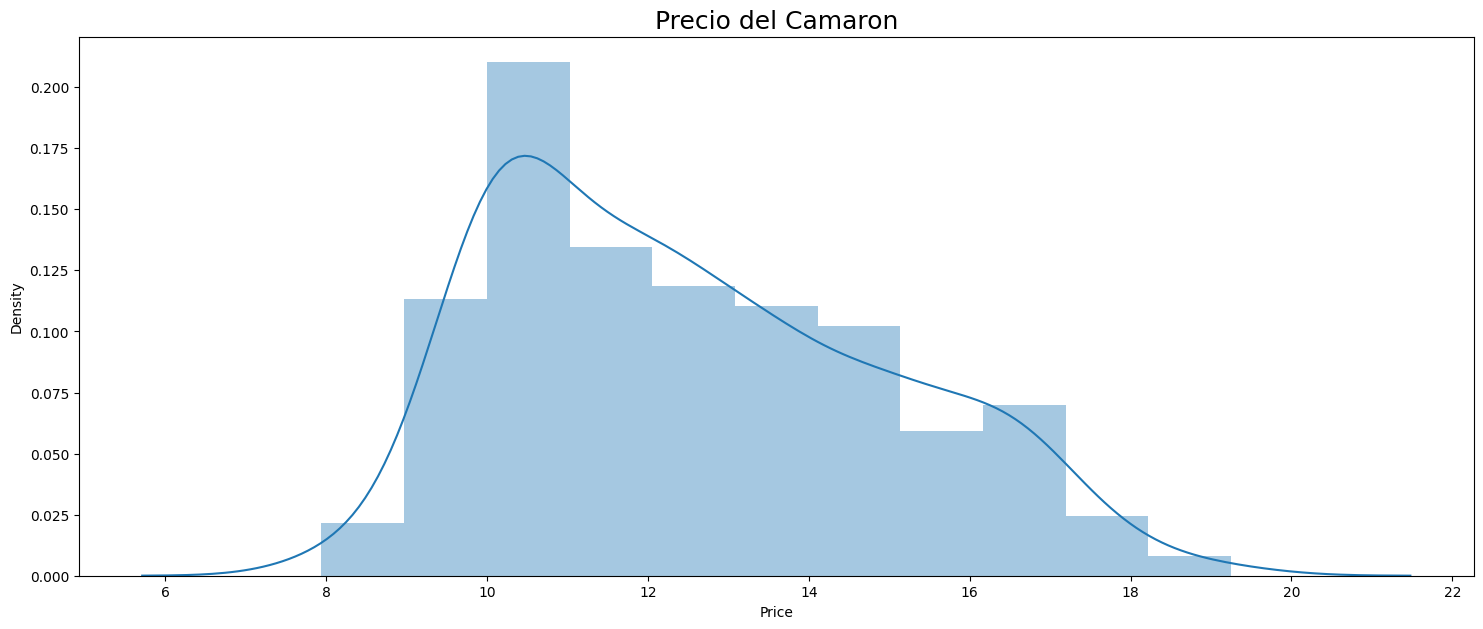

In [12]:
ax = sns.distplot(df['Price']) # histogram distribution
plt.title('Precio del Camaron', fontdict={'fontsize':18})

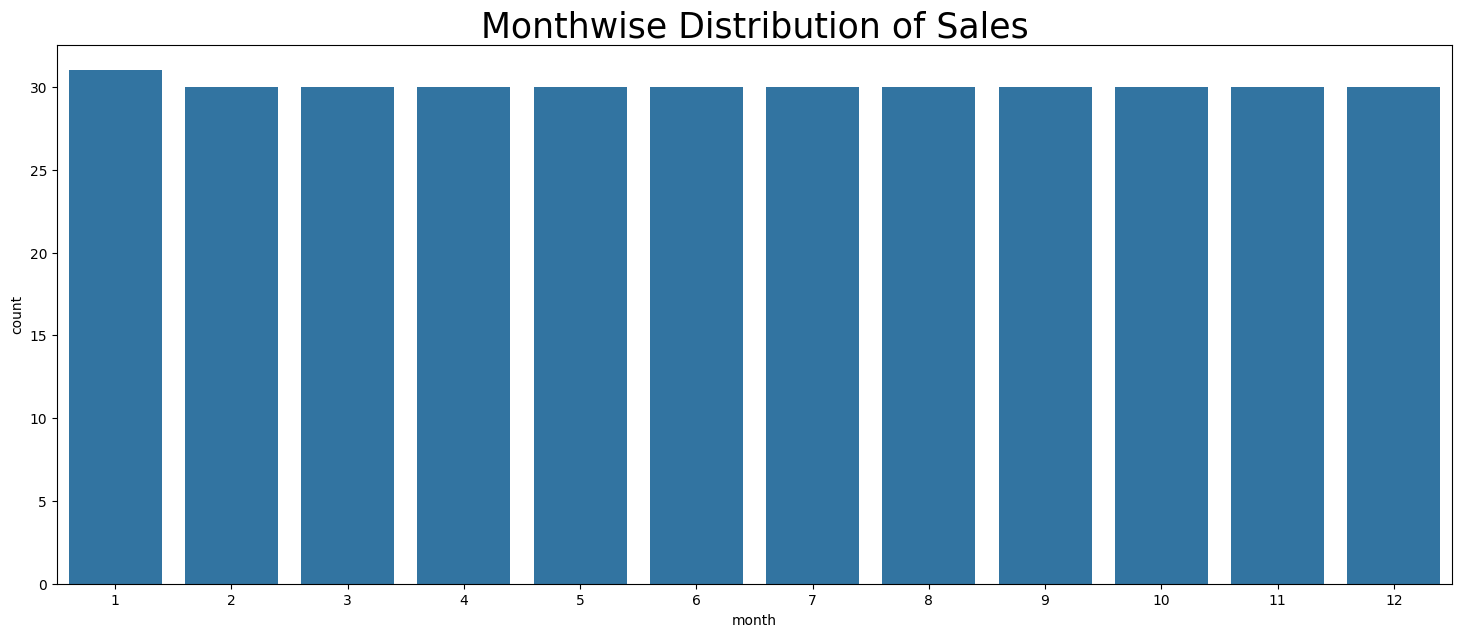

In [13]:
plt.figure() # figsize=(9,5)
sns.countplot(x = df['month'],  data= df)
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

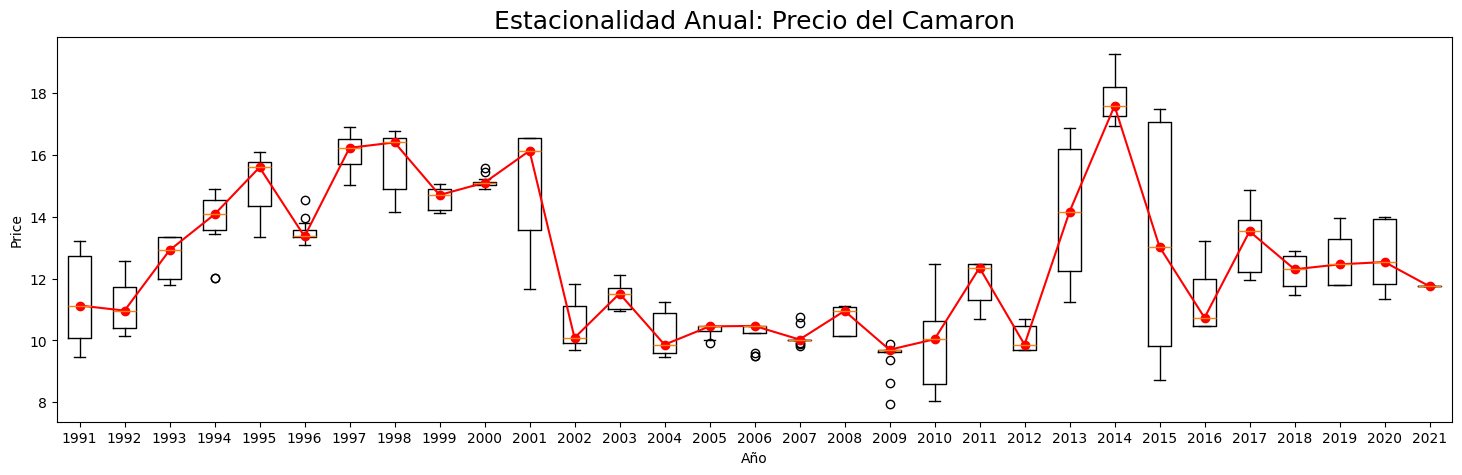

In [14]:
# Crear boxplots anuales

fig,ax = plt.subplots( figsize = (18,5))


# Extract year component from date
#df['year'] = df['ds'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df['year'].unique():
    data_anual[year] = df.loc[df['year'] == year, 'Price'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart

plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
#sns.boxplot(x=df_pivot['ds'].dt.year, y=df_pivot["ACUACULTURA"])
plt.xlabel('Año')
plt.ylabel('Price')
plt.title('Estacionalidad Anual: Precio del Camaron', fontdict={'fontsize':18})

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

fig.suptitle('');




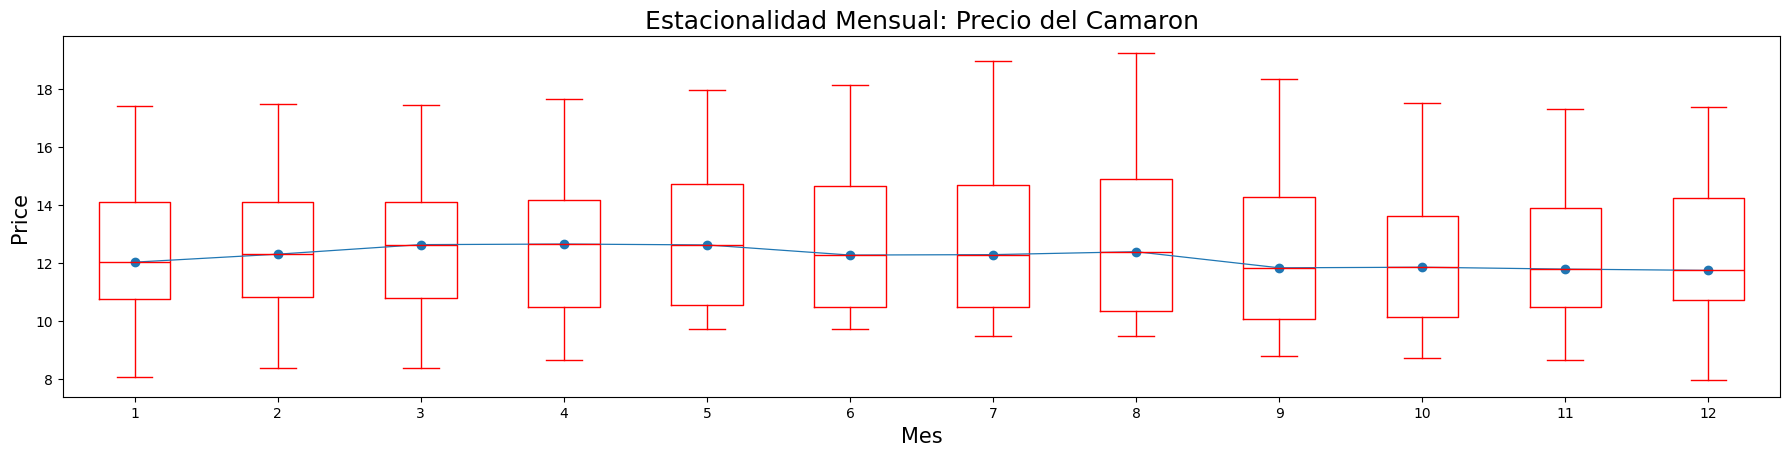

In [15]:
# Crear boxplots mensuales

fig,ax = plt.subplots(figsize = (18,5))

df.boxplot(column="Price", by='month', color="red", ax = ax )
# Add the median line graph
df.groupby('month')["Price"].median().plot(style='o-', linewidth=0.9,)
plt.xlabel('Mes', fontdict={'fontsize':15})
plt.ylabel('Price', fontdict={'fontsize':15})
plt.title('Estacionalidad Mensual: Precio del Camaron', fontdict={'fontsize':18})   
plt.tight_layout()

fig.suptitle('');

plt.show()

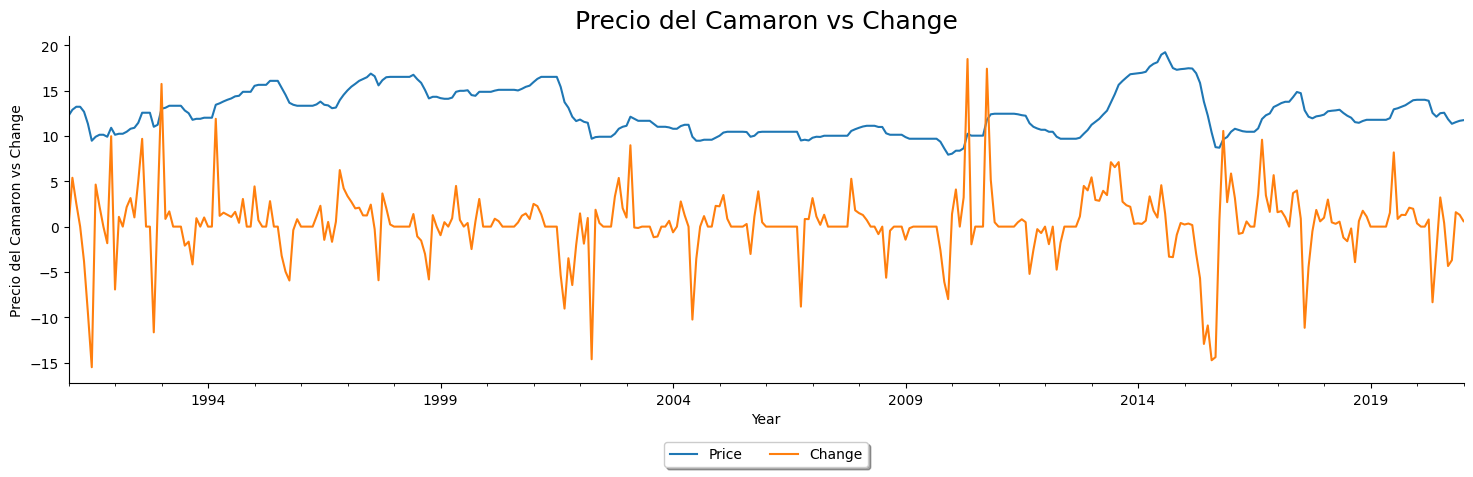

In [16]:
fig,ax = plt.subplots(figsize = (18,5))
camaron = df[['Date', 'Price', 'Change']]
camaron.set_index("Date", inplace = True)

camaron.plot(label='Duomo', ax = ax, )

plt.xlabel("Year")
plt.ylabel("Precio del Camaron vs Change")
plt.title('Precio del Camaron vs Change', fontdict={'fontsize':18})
sns.despine()

#
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show();

## Graficos de Autocorrelacion

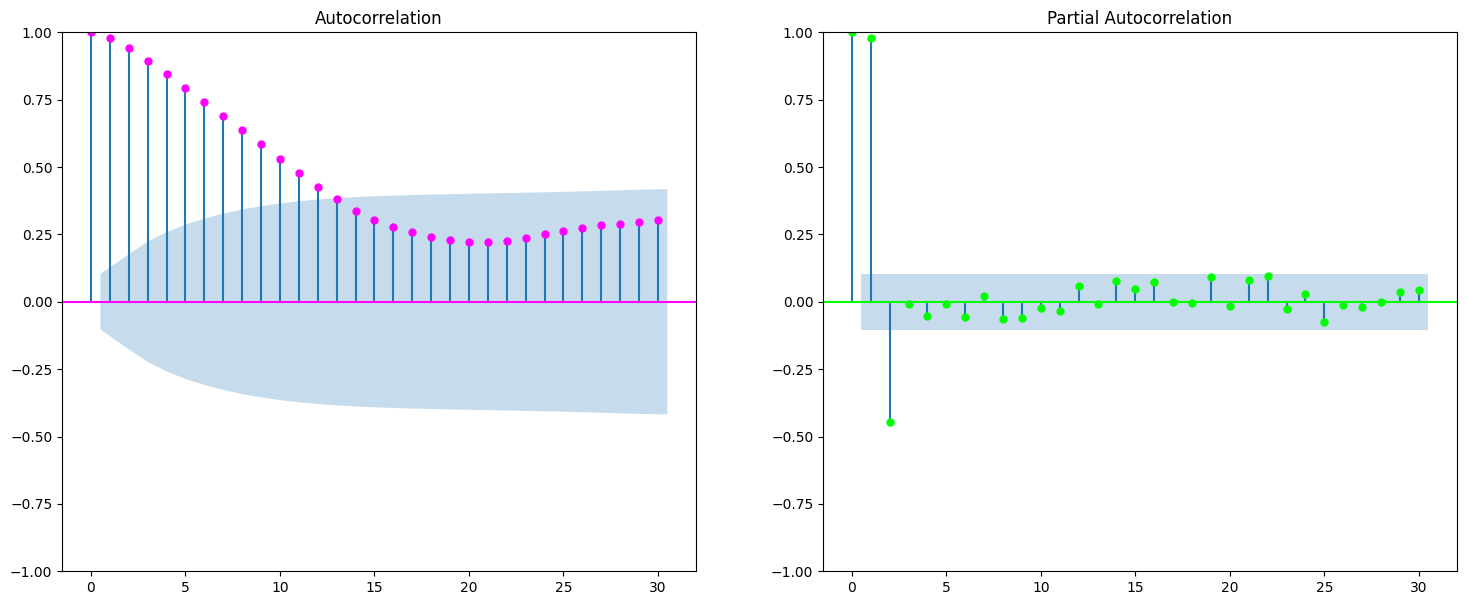

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["Price"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["Price"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

## Descomponiento la Series

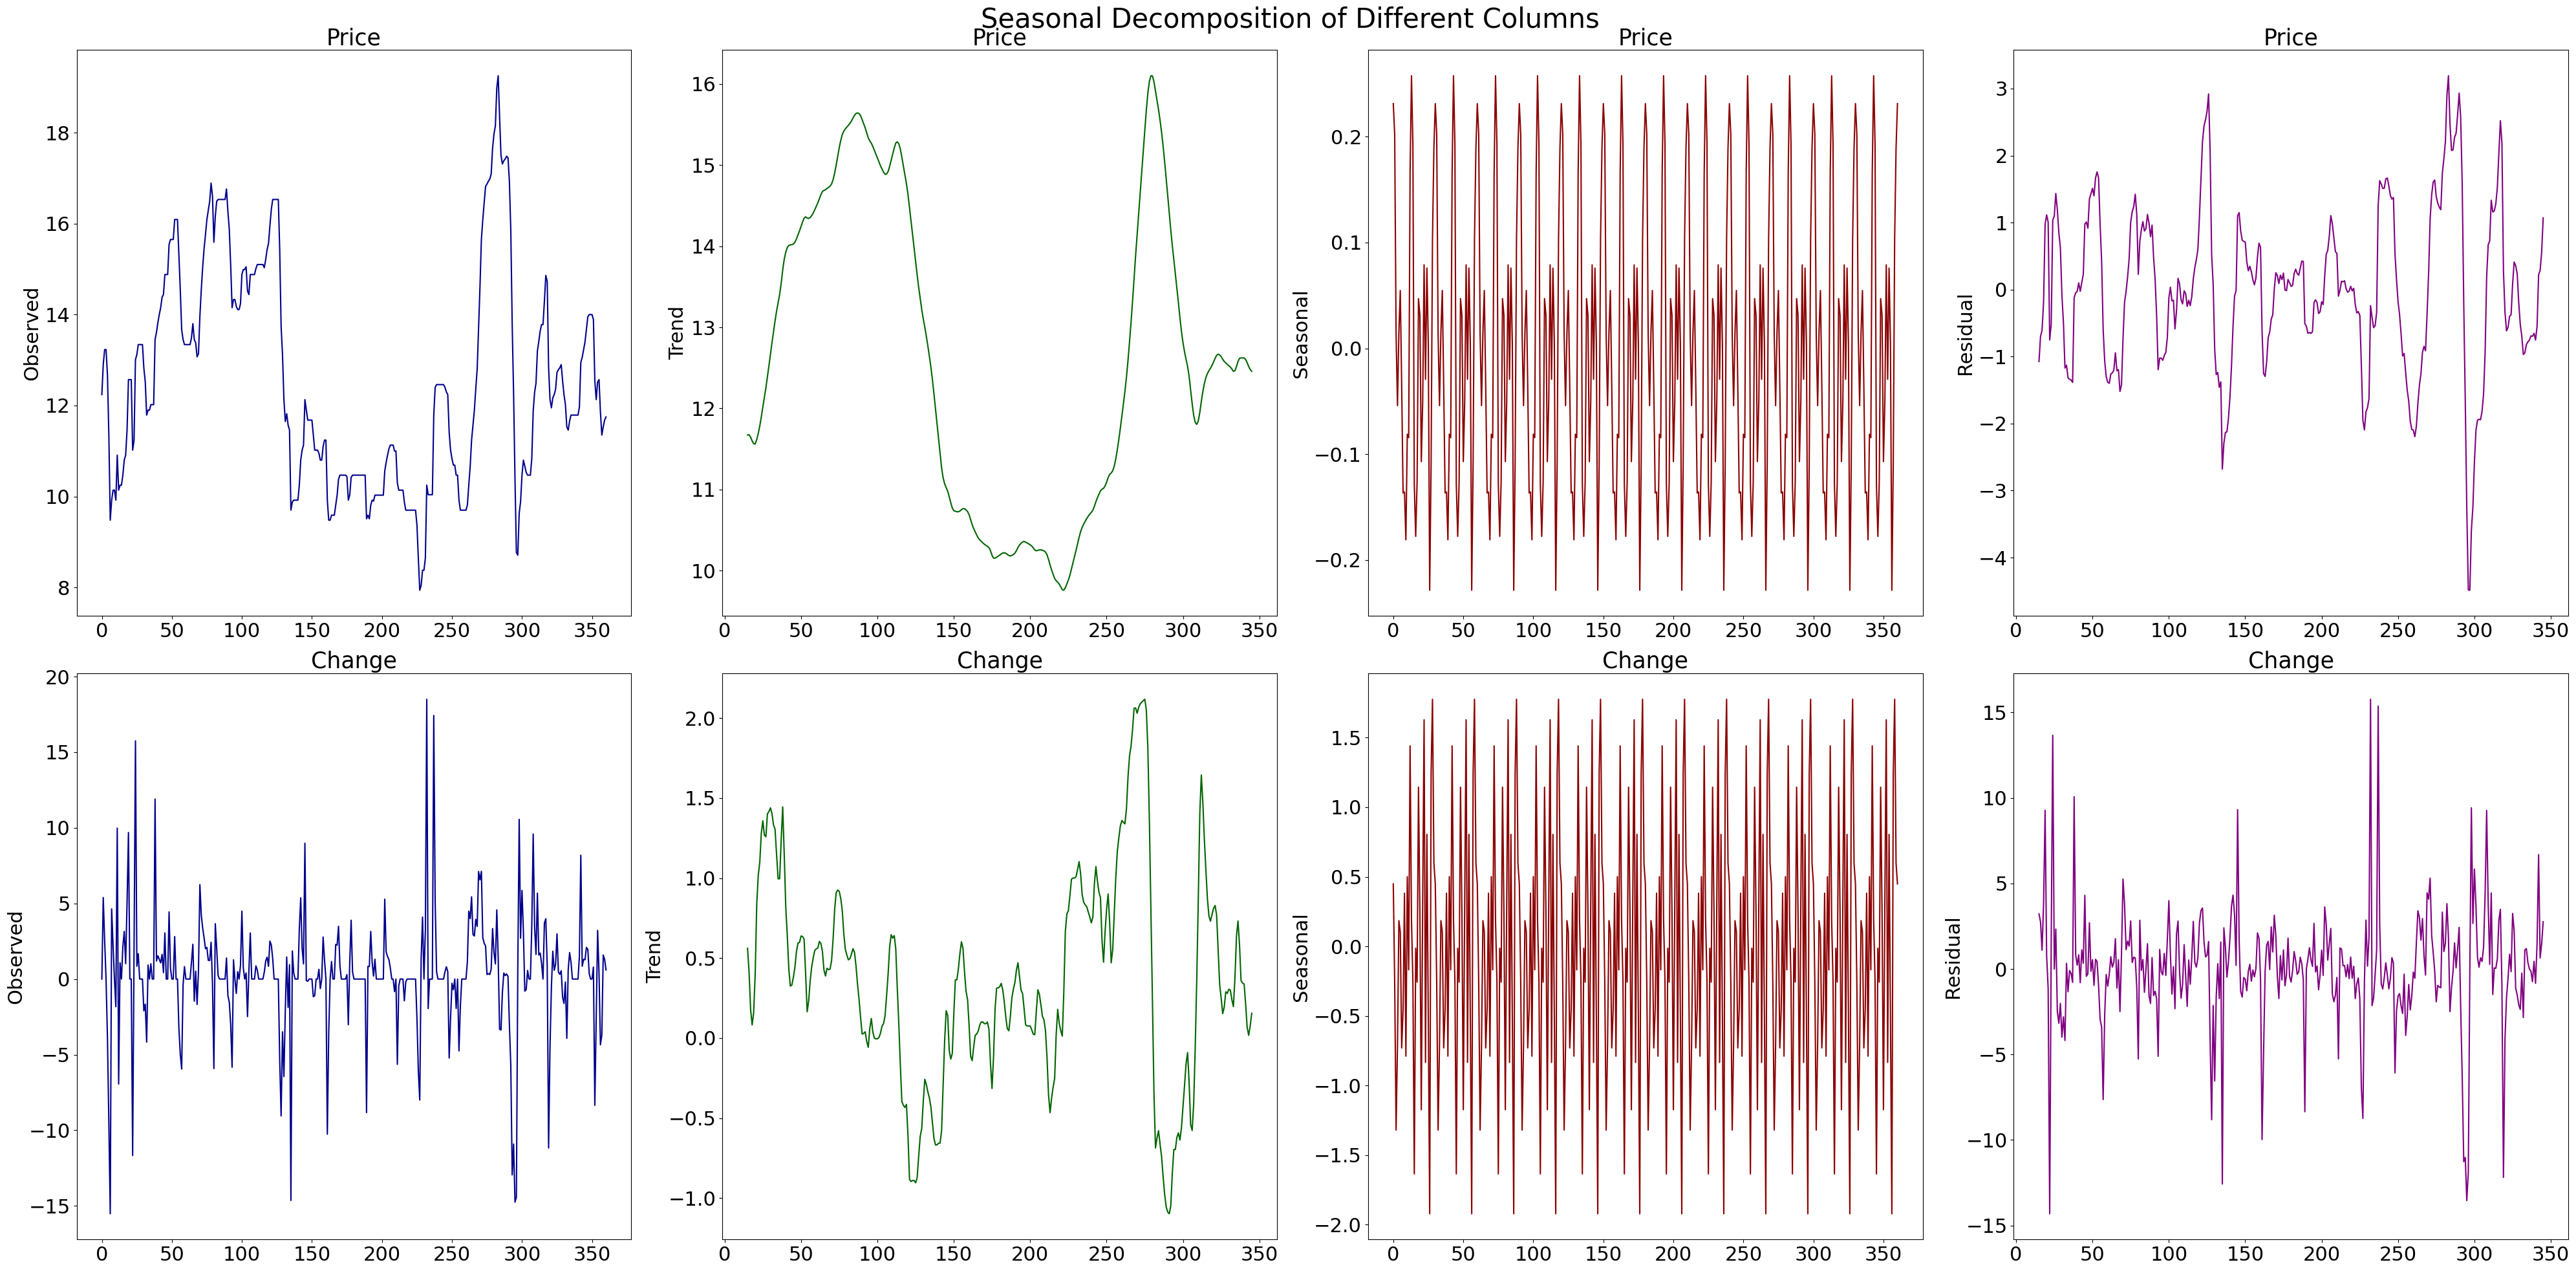

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Define darker colors using RGB values
colors = [(0, 0, 139), (0, 100, 0), (139, 0, 0), (128, 0, 128)]  # Dark blue, Dark green, Dark red, Dark purple

# Normalize RGB values to range [0, 1]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# Perform seasonal decomposition for each column
columns = ['Price', 'Change']
fig, axes = plt.subplots(len(columns), 4, figsize=(40, 20))

for i, col in enumerate(columns):
    decompose = seasonal_decompose(df[col], model='additive', period=30)
    
    decompose.observed.plot(ax=axes[i, 0], color=colors[0], fontsize=22)
    axes[i, 0].set_ylabel('Observed', fontsize=22)
    axes[i, 0].set_title(col, fontsize=25)
    
    decompose.trend.plot(ax=axes[i, 1], color=colors[1], fontsize=22)
    axes[i, 1].set_ylabel('Trend', fontsize=22)
    axes[i, 1].set_title(col, fontsize=25)
    
    decompose.seasonal.plot(ax=axes[i, 2], color=colors[2], fontsize=22)
    axes[i, 2].set_ylabel('Seasonal', fontsize=22)
    axes[i, 2].set_title(col, fontsize=25)
    
    decompose.resid.plot(ax=axes[i, 3], color=colors[3], fontsize=22)
    axes[i, 3].set_ylabel('Residual', fontsize=22)
    axes[i, 3].set_title(col, fontsize=25)

# Add main title
fig.suptitle('Seasonal Decomposition of Different Columns', fontsize=30)

plt.tight_layout()
plt.show()

## Renombrar variables

In [19]:
shrimp = df.copy()
shrimp = shrimp.rename(columns={"Date":"ds", "Price":"y"})
shrimp["unique_id"] = 1
shrimp = shrimp.drop(["day","month", "dayofweek", "year"], axis = 1)
shrimp

,ds,y,Change,unique_id
0,1991-01-01,12.24,0.00,1
1,1991-02-01,12.90,5.39,1
2,1991-03-01,13.23,2.56,1
3,1991-04-01,13.23,0.00,1
4,1991-05-01,12.68,-3.84,1
...,...,...,...,...
356,2020-09-01,11.86,-4.35,1
357,2020-10-01,11.35,-3.70,1
358,2020-11-01,11.53,1.59,1
359,2020-12-01,11.68,1.30,1


Construyamos variables adicionales

In [20]:
shrimp['3-month'] = shrimp.groupby('unique_id')['y'].rolling(window = 3, ).mean().reset_index(0, drop=True)
shrimp['5-month'] = shrimp.groupby('unique_id')['y'].rolling(window = 5, ).mean().reset_index(0, drop=True)
shrimp['8-month'] = shrimp.groupby('unique_id')['y'].rolling(window = 8, ).mean().reset_index(0, drop=True)
shrimp['10-month'] = shrimp.groupby('unique_id')['y'].rolling(window = 10, ).mean().reset_index(0, drop=True)
shrimp['12-month'] = shrimp.groupby('unique_id')['y'].rolling(window = 12, ).mean().reset_index(0, drop=True)
shrimp['15-month'] = shrimp.groupby('unique_id')['y'].rolling(window = 15, ).mean().reset_index(0, drop=True)

shrimp.dropna(inplace = True)
shrimp

,ds,y,Change,unique_id,3-month,5-month,8-month,10-month,12-month,15-month
14,1992-03-01,10.25,0.00,1,10.213333,10.294,10.20875,10.250,10.700833,11.118667
15,1992-04-01,10.47,2.15,1,10.323333,10.404,10.27750,10.162,10.470833,11.000667
16,1992-05-01,10.80,3.15,1,10.506667,10.382,10.36000,10.294,10.314167,10.860667
17,1992-06-01,10.91,1.02,1,10.726667,10.536,10.45625,10.393,10.277500,10.706000
18,1992-07-01,11.46,5.04,1,11.056667,10.778,10.64875,10.525,10.442500,10.588000
...,...,...,...,...,...,...,...,...,...,...
356,2020-09-01,11.86,-4.35,1,12.316667,12.326,12.94000,13.147,13.212500,13.186000
357,2020-10-01,11.35,-3.70,1,11.926667,12.086,12.60875,12.887,13.041667,13.079333
358,2020-11-01,11.53,1.59,1,11.580000,11.966,12.30000,12.640,12.862500,12.977333
359,2020-12-01,11.68,1.30,1,11.520000,11.798,12.02375,12.408,12.673333,12.874000


# **División de datos**

Vamos a dividir los datos en:

1. Datos de entrenamiento
2. Datos de prueba

Vamos a realizar un `Forecasting` de 24 meses

In [ ]:
#shrimp.tail(25)

In [21]:
train = shrimp.loc[shrimp['ds'] <= '2019-01-01']
test  = shrimp[shrimp['ds'] > '2019-01-01']

test.drop("y",axis=1, inplace=True)
train.shape, test.shape

((323, 10), (24, 9))

In [23]:
train

,ds,y,Change,unique_id,3-month,5-month,8-month,10-month,12-month,15-month
14,1992-03-01,10.25,0.00,1,10.213333,10.294,10.20875,10.250,10.700833,11.118667
15,1992-04-01,10.47,2.15,1,10.323333,10.404,10.27750,10.162,10.470833,11.000667
16,1992-05-01,10.80,3.15,1,10.506667,10.382,10.36000,10.294,10.314167,10.860667
17,1992-06-01,10.91,1.02,1,10.726667,10.536,10.45625,10.393,10.277500,10.706000
18,1992-07-01,11.46,5.04,1,11.056667,10.778,10.64875,10.525,10.442500,10.588000
...,...,...,...,...,...,...,...,...,...,...
332,2018-09-01,11.53,-3.92,1,11.930000,12.246,12.44750,12.418,12.358333,12.533333
333,2018-10-01,11.46,0.61,1,11.670000,11.958,12.28875,12.340,12.317500,12.315333
334,2018-11-01,11.66,1.75,1,11.550000,11.782,12.14750,12.270,12.275000,12.236667
335,2018-12-01,11.79,1.11,1,11.636667,11.692,12.01750,12.176,12.237500,12.214000


In [24]:
test

,ds,Change,unique_id,3-month,5-month,8-month,10-month,12-month,15-month
337,2019-02-01,0.00,1,11.790000,11.698,11.78500,11.972,12.111667,12.178000
338,2019-03-01,0.00,1,11.790000,11.764,11.72875,11.861,12.028333,12.148000
339,2019-04-01,0.00,1,11.790000,11.790,11.70000,11.786,11.941667,12.110000
340,2019-05-01,0.00,1,11.790000,11.790,11.73250,11.741,11.849167,12.047333
341,2019-06-01,1.53,1,11.850000,11.826,11.79625,11.736,11.801667,11.992667
342,2019-07-01,8.19,1,12.236667,12.058,11.95750,11.878,11.860833,12.000667
343,2019-08-01,0.85,1,12.660000,12.312,12.11625,12.038,11.947500,12.011333
344,2019-09-01,1.30,1,13.080000,12.600,12.29625,12.195,12.089167,12.057333
345,2019-10-01,1.28,1,13.230000,12.922,12.49750,12.356,12.250833,12.134667
346,2019-11-01,2.09,1,13.436667,13.264,12.73375,12.545,12.419167,12.245333


# Modelando con Neuralforecast

## Cargamos las librerias

In [25]:
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import MLP, Informer
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss, MAE, RMSE, MSE


- ### Cargamos el modelo

In [36]:
model = Informer(h = 24,
                 input_size = 2* 24,
                 hidden_size = 512,                                               # int=128, units of embeddings and encoders.
                 conv_hidden_size = 128,                                           #int=32, channels of the convolutional encoder.
                 n_head = 128,                                                      # int=4, controls number of multi-head’s attention.
                 #loss=MQLoss(level=[80, 90]),
                 loss = DistributionLoss(distribution='Normal', level=[80, 95]),
                 #loss=DistributionLoss(distribution='StudentT', level=[80, 90]),
                 #loss=DistributionLoss(distribution='NegativeBinomial', level=[80, 90], num_samples = 1000),
                 #loss=DistributionLoss(distribution='Poisson', level=[80, 90], num_samples = 1000, ),
                 #loss = MAE(),
                 #loss = RMSE(),
                 #loss = MSE(),
                 #hist_exog_list = ['Arrivals in Qtls.', 'Min', 'Max'],
                 futr_exog_list = ['Change', '3-month', '5-month', '8-month','10-month', '12-month', '15-month'],
                 #stat_exog_list = ['Arrivals in Qtls.', 'Min', 'Max'],
                 scaler_type = 'standard', # 'standard'  'robust'
                 #activation = ["Tanh"],
                 learning_rate=1e-3,
                 encoder_layers = 2,                                             # Número de capas para el decodificador TCN. int = 2
                 decoder_layers = 2,                                             # Número de capas para el decodificador MLP. int = 2  
                 max_steps = 50,                                                 
                 val_check_steps=50,
                 windows_batch_size = 32,
                 batch_size = 32
                 #early_stop_patience_steps = 1
                 )


Seed set to 1


- ### Construimos el nuestro modelo

In [37]:
nf = NeuralForecast(
    models=[model],
    freq = 'MS'
)

- ### Entrenamos el modelo

In [38]:
# fit the models
nf.fit(df=train)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | DistributionLoss | 5      | train
1 | padder_train  | ConstantPad1d    | 0      | train
2 | scaler        | TemporalNorm     | 0      | train
3 | enc_embedding | DataEmbedding    | 5.1 K  | train
4 | dec_embedding | DataEmbedding    | 5.1 K  | train
5 | encoder       | TransEncoder     | 3.2 M  | train
6 | decoder       | TransDecoder     | 4.5 M  | train
-----------------------------------------------------------
7.6 M     Trainable params
5         Non-trainable params
7.6 M     Total params
30.568    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.


- ## Realizamos Forecasting

In [39]:
forecast_df_nf_exo = nf.predict(futr_df = test, )

forecast_df_nf_exo.head()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,Informer,Informer-median,Informer-lo-95,Informer-lo-80,Informer-hi-80,Informer-hi-95
unique_id,,,,,,,
1,2019-02-01,11.595369,13.980574,12.276071,13.185713,12.108745,14.183836
1,2019-03-01,12.059729,12.181433,11.459028,12.448074,11.832440,9.955125
1,2019-04-01,11.327112,12.577841,9.913587,11.532910,10.963968,12.321082
1,2019-05-01,10.603923,10.595278,13.435827,10.208438,9.277419,13.899320
1,2019-06-01,12.563681,10.947794,13.624793,12.683636,13.026418,11.773799


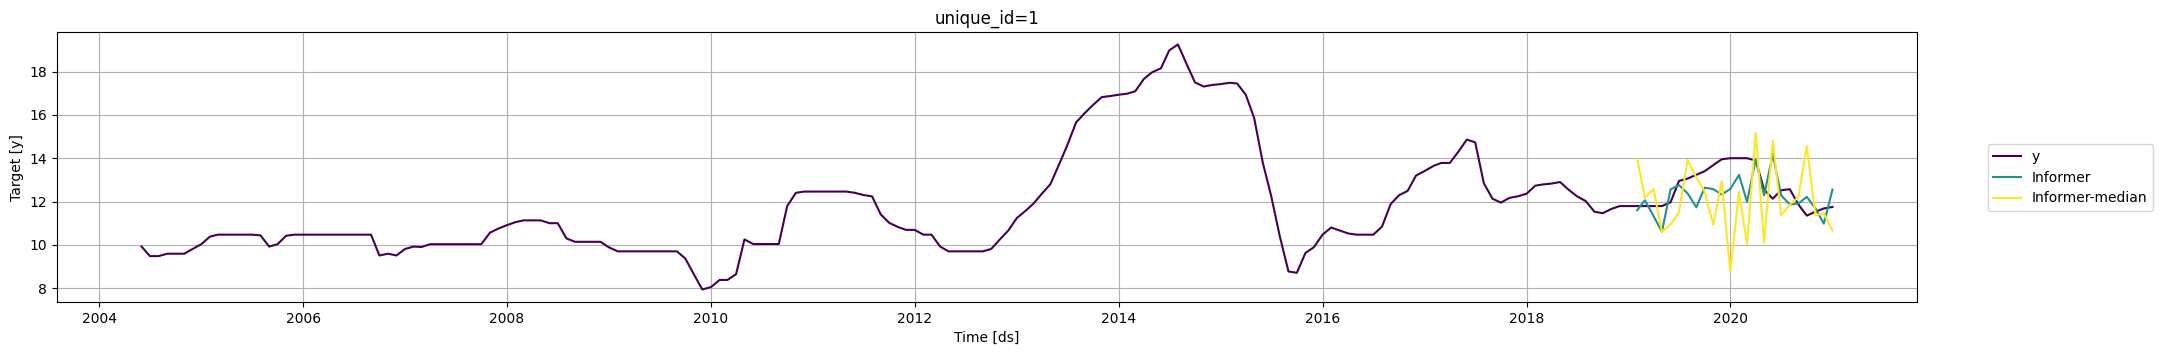

In [41]:
plot_series(shrimp, forecast_df_nf_exo.reset_index(), max_insample_length= 200, )

- ## Evaluar el rendimiento del modelo.

- ### **Realizar validación cruzada de series temporales**

In [42]:
cv_result = nf.cross_validation(
    train,
    n_windows = 3,  # number of models to train/splits to perform
    )

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | DistributionLoss | 5      | train
1 | padder_train  | ConstantPad1d    | 0      | train
2 | scaler        | TemporalNorm     | 0      | train
3 | enc_embedding | DataEmbedding    | 5.1 K  | train
4 | dec_embedding | DataEmbedding    | 5.1 K  | train
5 | encoder       | TransEncoder     | 3.2 M  | train
6 | decoder       | TransDecoder     | 4.5 M  | train
-----------------------------------------------------------
7.6 M     Trainable params
5         Non-trainable params
7.6 M     Total params
30.568    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [43]:
cv_result.head()

,ds,cutoff,Informer,Informer-median,Informer-lo-95,Informer-lo-80,Informer-hi-80,Informer-hi-95,y
unique_id,,,,,,,,,
1,2016-12-01,2016-11-01,15.883632,14.994545,14.475018,17.868156,13.447192,14.667668,13.20
1,2017-01-01,2016-11-01,14.381838,13.954733,14.502215,13.437887,11.681782,13.210521,13.41
1,2017-02-01,2016-11-01,14.646927,15.487955,16.772703,16.964149,16.155695,14.704230,13.64
1,2017-03-01,2016-11-01,16.224621,15.238783,19.693335,15.185925,17.716204,17.273090,13.78
1,2017-04-01,2016-11-01,15.063561,14.852162,13.810756,11.230930,13.590440,16.023497,13.78


In [44]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

- Loss = MAE

In [34]:
evaluation_df_ml_rmse = evaluate_cross_validation(cv_result, rmse)
evaluation_df_ml_rmse

,Informer,best_model
unique_id,,
1,2.187658,Informer


- Loss distribución Normal

In [48]:
evaluation_df_ml_rmse = evaluate_cross_validation(cv_result, rmse)
evaluation_df_ml_rmse

,Informer,Informer-median,Informer-lo-95,Informer-lo-80,Informer-hi-80,Informer-hi-95,best_model
unique_id,,,,,,,
1,1.898521,2.449997,3.021501,2.877367,2.405765,2.561478,Informer


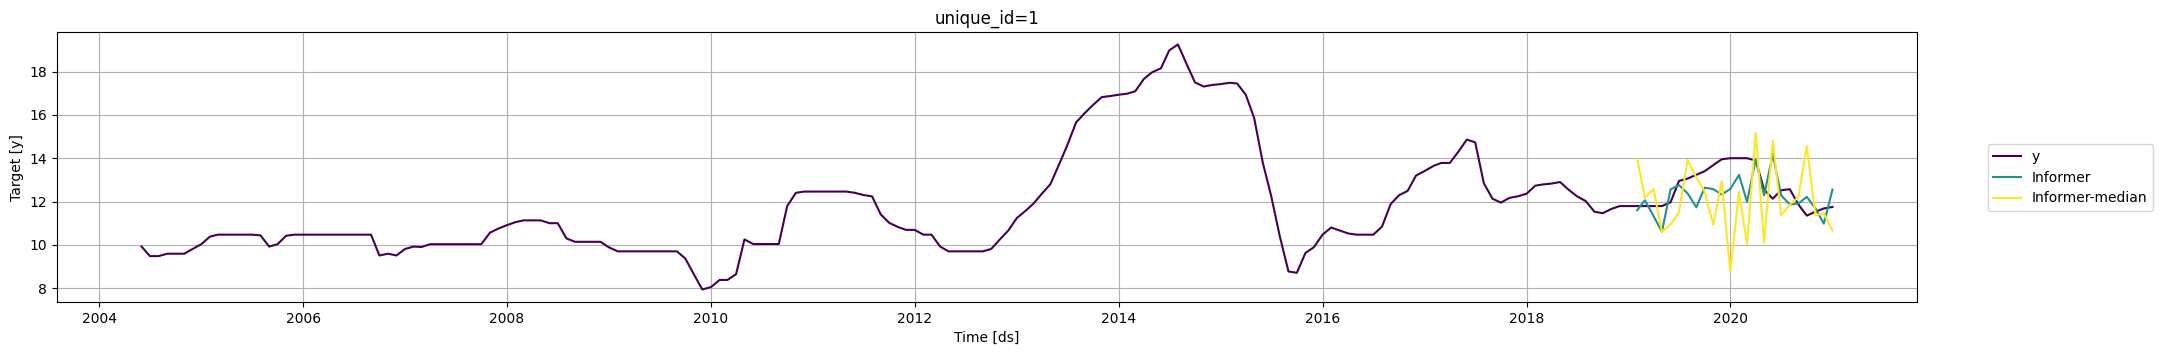

In [49]:
plot_series(shrimp, forecast_df_nf_exo.reset_index(), max_insample_length= 200, )

# Conclusion

